In [77]:
%pip install seaborn
%pip install tabulate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\ATI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\ATI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# df = pd.read_csv('Complete_NASA_TLX.csv', header=None)
# same but ignore the first two rows
df = pd.read_csv('Complete_NASA_TLX.csv', header=None, skiprows=2)
df.columns = ['Participant', 'Technique', 'Mental', 'Physical', 'Temporal', 'Performance', 'Effort', 'Frustration']

df.Technique.unique()

array(['VR Controllers', 'Eye Tracking + Hand Tracking', 'NeuroGaze'],
      dtype=object)

In [80]:

# Assuming df is your DataFrame

# Initialize an empty list for the new rows
new_rows = []

# A dictionary to temporarily store the scores for each participant
participant_scores = {}

# compute final score for each participant
for participant in df['Participant'].unique():
    pdf = df[df['Participant'] == participant]
    
    # Initialize a temporary dictionary to hold scores for each technique
    scores = {'Eye Tracking + Hand Tracking': None, 'NeuroGaze': None, 'VR Controllers': None}
    
    for technique in pdf["Technique"].unique():
        tpdf = pdf[pdf['Technique'] == technique]
        
        # score = Mental + physical + temporal + effort + frustration + (7 - performance)
        score = tpdf['Mental'].values[0] + tpdf['Physical'].values[0] + tpdf['Temporal'].values[0] + tpdf['Effort'].values[0] + tpdf['Frustration'].values[0] + (7 - tpdf['Performance'].values[0])
        
        # Assign the score to the correct technique
        if technique == "Eye Tracking + Hand Tracking":
            scores['Eye Tracking + Hand Tracking'] = score
        elif technique == "NeuroGaze":
            scores['NeuroGaze'] = score
        elif technique == "VR Controllers":
            scores['VR Controllers'] = score
    
    # Save the scores dictionary for this participant
    participant_scores[participant] = scores

# Convert the participant_scores dictionary to a format suitable for a DataFrame
for participant, scores in participant_scores.items():
    row = {'Participant': participant}
    row.update(scores)
    new_rows.append(row)
        
# Create the DataFrame with the specified headers
aggregated_tlx_df = pd.DataFrame(new_rows)

# Print the DataFrame to check it
print(aggregated_tlx_df)

# Save to CSV
aggregated_tlx_df.to_csv("aggregated_tlx.csv", index=False)



    Participant  Eye Tracking + Hand Tracking  NeuroGaze  VR Controllers
0             2                            29         22              22
1             3                            27         28              21
2             4                             8         20              11
3             5                             7         13               9
4             6                             7         12               7
5             7                            26         19              20
6             8                            19         25              16
7             9                             5         12               8
8            10                             6          8               6
9             1                            21          9              29
10           12                            28         15              30
11           13                            27         12              26
12           14                            25      

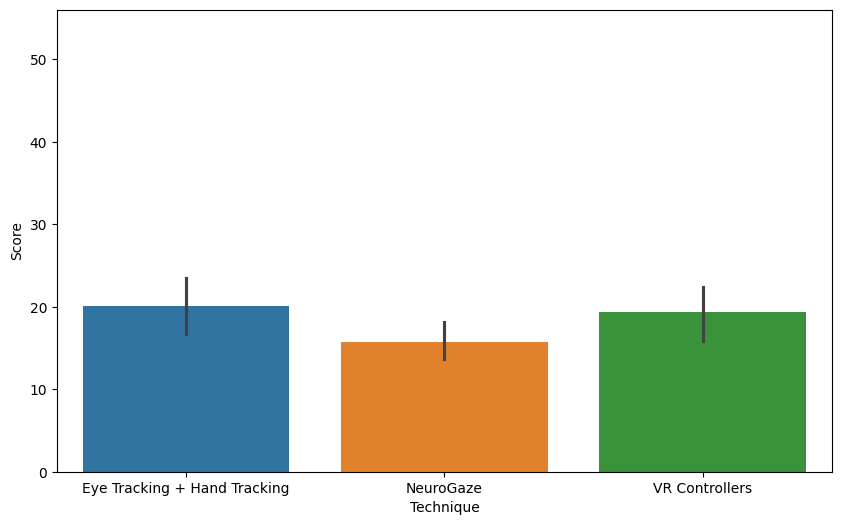

In [81]:
# Melt the DataFrame to long format
melted_df = aggregated_tlx_df.melt(id_vars=["Participant"], 
                                   var_name="Technique", 
                                   value_name="Score")

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='Technique', y='Score', data=melted_df, ax=ax, hue="Technique", errorbar=('ci', 95))

ax.set_ylim(0, 56)

plt.show()

C:\Users\ATI\AppData\Local\Temp\ipykernel_21560\1292623882.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha="right")  # Rotate x-axis labels
C:\Users\ATI\AppData\Local\Temp\ipykernel_21560\1292623882.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha="right")  # Rotate x-axis labels
C:\Users\ATI\AppData\Local\Temp\ipykernel_21560\1292623882.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha="right")  # Rotate x-axis labels
C:\Users\ATI\AppData\Local\Temp\ipykernel_21560\1292623882.py:9: UserWarning: set_ticklabels() should only be used with a fixed

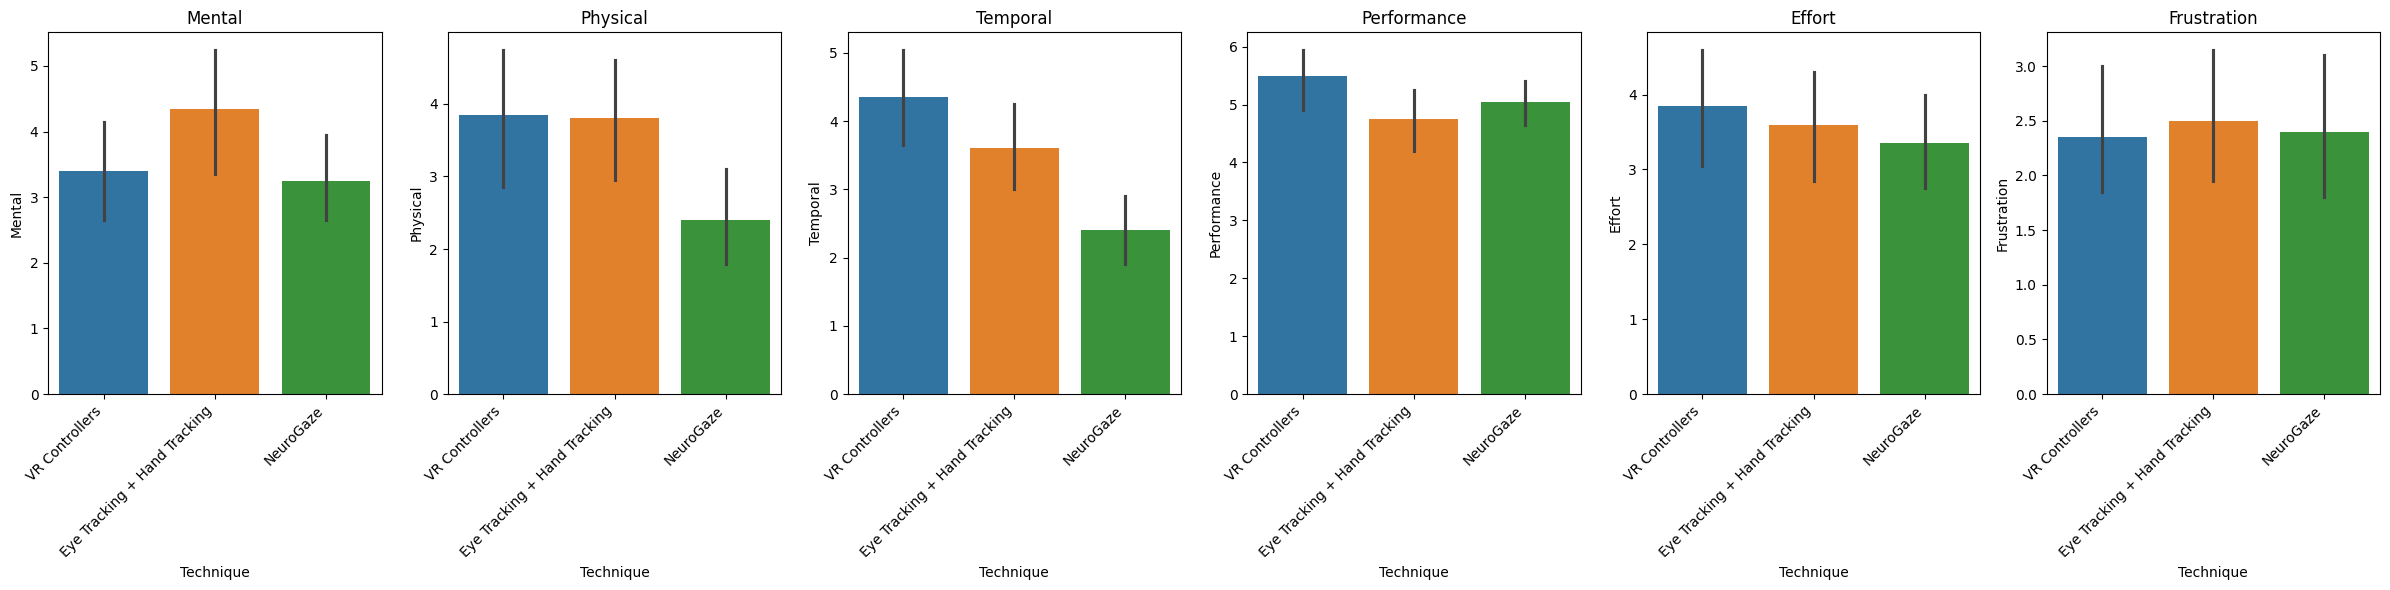

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame 'df' and plotting code
fig, ax = plt.subplots(1, 6, figsize=(24, 6))  # Increased figure size for better spacing

for i, question in enumerate(['Mental', 'Physical', 'Temporal', 'Performance', 'Effort', 'Frustration']):
    sns.barplot(x='Technique', y=question, data=df, ax=ax[i], hue="Technique", errorbar=('ci', 95))
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha="right")  # Rotate x-axis labels
    ax[i].set_title(question)  # Optionally set the title for each subplot to indicate the question

fig.tight_layout()  # Adjust layout to make room for the rotated x-axis labels and prevent overlap
plt.show()  # Display the plot


In [92]:
# make table for Friedman test in SPSS
# currently columns are Participant, Technique, Score
# we need the index to be Participant and columns to be Technique
pivot_df = melted_df.pivot(index='Participant', columns='Technique', values='Score')
pivot_df.to_csv('NASA_TLX.csv')

In [111]:
# perform friedman test in python
from scipy.stats import friedmanchisquare

print(aggregated_tlx_df['NeuroGaze'])
friedmanchisquare(aggregated_tlx_df['NeuroGaze'], aggregated_tlx_df['VR Controllers'], aggregated_tlx_df['Eye Tracking + Hand Tracking'])

FriedmanchisquareResult(statistic=2.4473684210526496, pvalue=0.29414447801663574)

In [110]:
import pandas as pd
from scipy.stats import wilcoxon

# Assuming 'aggregated_tlx_df' is your DataFrame with the columns for each technique

# Perform the Wilcoxon signed-rank tests
results = [
    {"Comparison": "NeuroGaze vs VR Controllers", "Test Result": wilcoxon(aggregated_tlx_df['NeuroGaze'], aggregated_tlx_df['VR Controllers'])},
    {"Comparison": "NeuroGaze vs Eye Tracking + Hand Tracking", "Test Result": wilcoxon(aggregated_tlx_df['NeuroGaze'], aggregated_tlx_df['Eye Tracking + Hand Tracking'])},
    {"Comparison": "VR Controllers vs Eye Tracking + Hand Tracking", "Test Result": wilcoxon(aggregated_tlx_df['VR Controllers'], aggregated_tlx_df['Eye Tracking + Hand Tracking'])}
]

# Create a DataFrame to hold the test results
test_results_df = pd.DataFrame(results)

# Split the 'Test Result' column into 'Statistic' and 'p-Value'
test_results_df[['Statistic', 'p-Value']] = pd.DataFrame(test_results_df['Test Result'].tolist(), index=test_results_df.index)

# Drop the original 'Test Result' column as it's no longer needed
test_results_df.drop(columns=['Test Result'], inplace=True)

# Print the DataFrame to check it
print(test_results_df)

# Export the DataFrame to a CSV file
test_results_df.to_csv("aggregated_wilcoxon_test_results.csv", index=False)


                                       Comparison  Statistic   p-Value
0                     NeuroGaze vs VR Controllers       53.0  0.090472
1       NeuroGaze vs Eye Tracking + Hand Tracking       42.5  0.017181
2  VR Controllers vs Eye Tracking + Hand Tracking       59.0  0.406050


C:\Users\ATI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon

In [105]:
# df = pd.read_csv('Complete_NASA_TLX.csv', header=None)
# same but ignore the first two rows
df = pd.read_csv('Complete_NASA_TLX.csv', header=None, skiprows=2)
df.columns = ['Participant', 'Technique', 'Mental', 'Physical', 'Temporal', 'Performance', 'Effort', 'Frustration']

df.Technique.unique()

# replace "Eye Tracking + Hand Tracking" with "Eye Tracking\n+ Hand Tracking"
# df['Technique'] = df['Technique'].replace('Eye Tracking + Hand Tracking', 'Eye Tracking\n+ Hand Tracking')

array(['VR Controllers', 'Eye Tracking + Hand Tracking', 'NeuroGaze'],
      dtype=object)

In [106]:
for i, question in enumerate(['Mental', 'Physical', 'Temporal', 'Performance', 'Effort', 'Frustration']):
    print(question)
    print(friedmanchisquare(df[question][df['Technique'] == 'NeuroGaze'], df[question][df['Technique'] == 'VR Controllers'], df[question][df['Technique'] == 'Eye Tracking + Hand Tracking']))
    
    for j, technique1 in enumerate(df['Technique'].unique()):
        for k, technique2 in enumerate(df['Technique'].unique()):
            if technique1 == technique2 or j > k:
                continue
            print(technique1, "VS", technique2)
            w = wilcoxon(df[question][df['Technique'] == technique1], df[question][df['Technique'] == technique2])
            print(w, "sig" if w.pvalue < 0.05 else "")
            print()
    
    # print(wilcoxon(df[question][df['Technique'] == 'NeuroGaze'], df[question][df['Technique'] == 'VR Controllers']))
    # print(wilcoxon(df[question][df['Technique'] == 'NeuroGaze'], df[question][df['Technique'] == 'Eye Tracking + Hand Tracking']))
    # print(wilcoxon(df[question][df['Technique'] == 'VR Controllers'], df[question][df['Technique'] == 'Eye Tracking + Hand Tracking']))
    print()
    print("=====================================")

Mental
FriedmanchisquareResult(statistic=3.4929577464788992, pvalue=0.1743869020521774)
VR Controllers VS Eye Tracking + Hand Tracking
WilcoxonResult(statistic=14.0, pvalue=0.025828560698326456) sig

VR Controllers VS NeuroGaze
WilcoxonResult(statistic=89.5, pvalue=0.8237779594699384) 

Eye Tracking + Hand Tracking VS NeuroGaze
WilcoxonResult(statistic=57.0, pvalue=0.12402359820387084) 


Physical
FriedmanchisquareResult(statistic=11.148148148148156, pvalue=0.0037949878334789695)
VR Controllers VS Eye Tracking + Hand Tracking
WilcoxonResult(statistic=17.0, pvalue=0.8866897393567406) 

VR Controllers VS NeuroGaze
WilcoxonResult(statistic=19.0, pvalue=0.018843332993424375) sig

Eye Tracking + Hand Tracking VS NeuroGaze
WilcoxonResult(statistic=12.0, pvalue=0.005915605813408598) sig


Temporal
FriedmanchisquareResult(statistic=18.633333333333365, pvalue=8.991312184636184e-05)
VR Controllers VS Eye Tracking + Hand Tracking
WilcoxonResult(statistic=11.0, pvalue=0.02561633200258813) sig

VR 

C:\Users\ATI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\ATI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [107]:
import pandas as pd
from scipy.stats import wilcoxon

# Assuming 'df' is your DataFrame

# Initialize a list to store each row of the final table
comparison_results = []

# Iterate through each question
for question in ['Mental', 'Physical', 'Temporal', 'Performance', 'Effort', 'Frustration']:
    # Iterate through each unique pair of techniques
    techniques = df['Technique'].unique()
    for i, technique1 in enumerate(techniques):
        for j, technique2 in enumerate(techniques):
            if technique1 == technique2 or i >= j:
                # Skip comparing a technique with itself or repeating comparisons
                continue
            
            # Perform the Wilcoxon test
            scores1 = df[question][df['Technique'] == technique1]
            scores2 = df[question][df['Technique'] == technique2]
            w, p = wilcoxon(scores1, scores2)
            
            # Prepare a dictionary for the row
            row = {
                'Question': question,
                'Technique Comparison': f"{technique1} VS {technique2}",
                'Statistic': w,
                'p-Value': p,
                'Significant': 'Yes' if p < 0.05 else 'No'
            }
            comparison_results.append(row)

# Create a DataFrame from the list of dictionaries
wilcoxon_comparisons_df = pd.DataFrame(comparison_results)

# Print the DataFrame to review the table
print(wilcoxon_comparisons_df)

# Optionally, you can save this DataFrame to a CSV for further analysis or sharing
wilcoxon_comparisons_df.to_csv("wilcoxon_comparisons.csv", index=False)


       Question                            Technique Comparison  Statistic  \
0        Mental  VR Controllers VS Eye Tracking + Hand Tracking       14.0   
1        Mental                     VR Controllers VS NeuroGaze       89.5   
2        Mental       Eye Tracking + Hand Tracking VS NeuroGaze       57.0   
3      Physical  VR Controllers VS Eye Tracking + Hand Tracking       17.0   
4      Physical                     VR Controllers VS NeuroGaze       19.0   
5      Physical       Eye Tracking + Hand Tracking VS NeuroGaze       12.0   
6      Temporal  VR Controllers VS Eye Tracking + Hand Tracking       11.0   
7      Temporal                     VR Controllers VS NeuroGaze        6.5   
8      Temporal       Eye Tracking + Hand Tracking VS NeuroGaze        7.0   
9   Performance  VR Controllers VS Eye Tracking + Hand Tracking       16.0   
10  Performance                     VR Controllers VS NeuroGaze       43.0   
11  Performance       Eye Tracking + Hand Tracking VS NeuroGaze 

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/table_image.png'

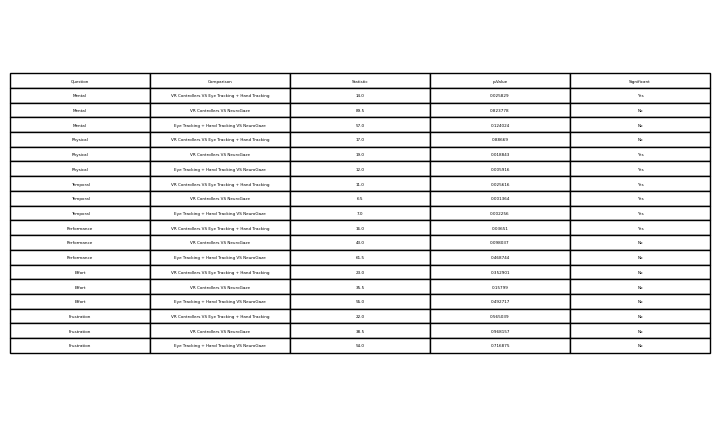

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

# Your data
data = {
    "Question": [
        "Mental", "Mental", "Mental", "Physical", "Physical", "Physical",
        "Temporal", "Temporal", "Temporal", "Performance", "Performance", "Performance",
        "Effort", "Effort", "Effort", "Frustration", "Frustration", "Frustration"
    ],
    "Comparison": [
        "VR Controllers VS Eye Tracking + Hand Tracking", "VR Controllers VS NeuroGaze", "Eye Tracking + Hand Tracking VS NeuroGaze",
        "VR Controllers VS Eye Tracking + Hand Tracking", "VR Controllers VS NeuroGaze", "Eye Tracking + Hand Tracking VS NeuroGaze",
        "VR Controllers VS Eye Tracking + Hand Tracking", "VR Controllers VS NeuroGaze", "Eye Tracking + Hand Tracking VS NeuroGaze",
        "VR Controllers VS Eye Tracking + Hand Tracking", "VR Controllers VS NeuroGaze", "Eye Tracking + Hand Tracking VS NeuroGaze",
        "VR Controllers VS Eye Tracking + Hand Tracking", "VR Controllers VS NeuroGaze", "Eye Tracking + Hand Tracking VS NeuroGaze",
        "VR Controllers VS Eye Tracking + Hand Tracking", "VR Controllers VS NeuroGaze", "Eye Tracking + Hand Tracking VS NeuroGaze"
    ],
    "Statistic": [
        14.0, 89.5, 57.0, 17.0, 19.0, 12.0,
        11.0, 6.5, 7.0, 16.0, 43.0, 61.5,
        23.0, 35.5, 55.0, 22.0, 38.5, 54.0
    ],
    "p-Value": [
        0.025829, 0.823778, 0.124024, 0.88669, 0.018843, 0.005916,
        0.025616, 0.001364, 0.002256, 0.03651, 0.098037, 0.468744,
        0.352901, 0.15799, 0.492717, 0.565039, 0.968157, 0.716875
    ],
    "Significant": [
        "Yes", "No", "No", "No", "Yes", "Yes",
        "Yes", "Yes", "Yes", "Yes", "No", "No",
        "No", "No", "No", "No", "No", "No"
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create a figure for the table
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center')

plt.subplots_adjust(left=0.2, bottom=0.2)
plt.savefig("/mnt/data/table_image.png", dpi=300)  # Save the table as an image
plt.show()
